#6IA - Modelos de Machine Learning

##Aula 6 - SVM

In [0]:
from google.colab import files

#uploaded = files.upload()

#for fn in uploaded.keys():
 # print('Arquivo "{name}" importado pelo usuário com tamanho de {length} bytes'.format(name=fn, length=len(uploaded[fn])))

In [0]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [27]:
iris = datasets.load_iris()
# Dimensoes da petala
X = iris["data"][:, (2,3)]
y = iris["target"]

# Seleciona somente os dois que vamos analisar
setosa_or_versicolor = (y==0) | (y==1)

X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

svm_clf = SVC(C=100, kernel='linear')
svm_clf.fit(X,y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [21]:
svm_clf.predict([[2.5, 1.1]])

array([1])

In [0]:
import matplotlib.pyplot as plt

def plot_svc_decision_boundary(svm_clf, xmin, xmax):    
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # a reta de nossa superfície de decisão tem como equacao w0*x0 + w1*x1 + b = 0, logo
    # x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1] #todos os valores de x1 em funcao dos valores de x0 na sup de decisao
    
    margin = 1/w[1] #estamos desenhando a superficie em funcao de x1, logo a margem também sera em funcao dele, por isso divido por 1/w[1], que é o deslocamento da superficie de decisao para as maregsn
    margin_up = decision_boundary + margin
    margin_down = decision_boundary - margin

    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, margin_up, "k--", linewidth=2)
    plt.plot(x0, margin_down, "k--", linewidth=2)


[0, 5.5, 0, 2]

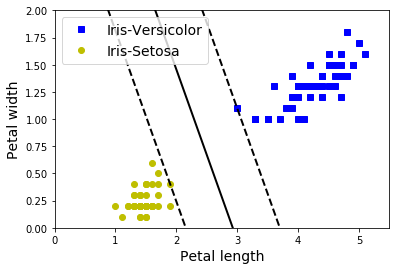

In [28]:
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.axis([0, 5.5, 0, 2])

[0, 5.5, 0, 2]

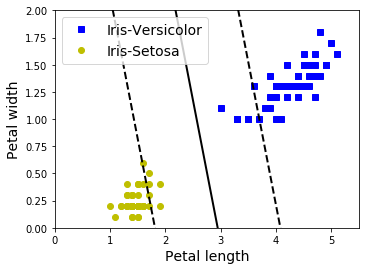

In [31]:
# Valor de C diferente

svm_clf = SVC(C=0.1, kernel='linear')
svm_clf.fit(X, y)

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.axis([0, 5.5, 0, 2])

In [32]:
# Adicionaod Outliers para verificacao
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
X1_with_outlier = np.concatenate([X, X_outliers[:1]], axis=0)
y1_with_outlier = np.concatenate([y, y_outliers[:1]], axis=0)
X2_with_outlier = np.concatenate([X, X_outliers[1:]], axis=0)
y2_with_outlier = np.concatenate([y, y_outliers[1:]], axis=0)


svm_clf = SVC(kernel="linear", C=10**9)
svm_clf.fit(X2_with_outlier, y2_with_outlier)

SVC(C=1000000000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

[0, 5.5, 0, 2]

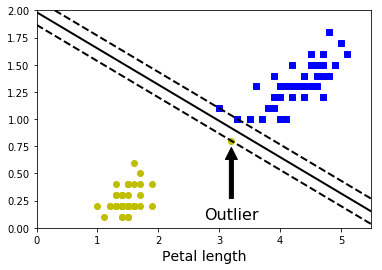

In [34]:
plt.plot(X2_with_outlier[:, 0][y2_with_outlier==1], X2_with_outlier[:, 1][y2_with_outlier==1], "bs")
plt.plot(X2_with_outlier[:, 0][y2_with_outlier==0], X2_with_outlier[:, 1][y2_with_outlier==0], "yo")
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])
